<a href="https://colab.research.google.com/github/DrumDong/Donggyu/blob/master/kaggle%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%97%B0%EC%8A%B5/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn as

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Check train data and test data
- There are too many features. So, I will use only features highly related with SalePrice


In [0]:
train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/home-data-for-ml-course/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/home-data-for-ml-course/test.csv')

In [365]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [366]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [367]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [368]:
test_data.dtypes # We should get the 'SalePrice' of test data with training the train data.

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [369]:
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [370]:
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

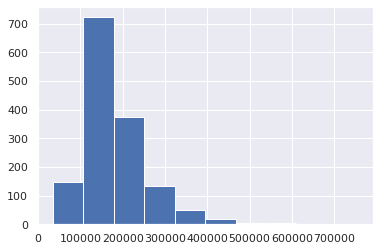

In [371]:
plt.hist(train_data['SalePrice'])

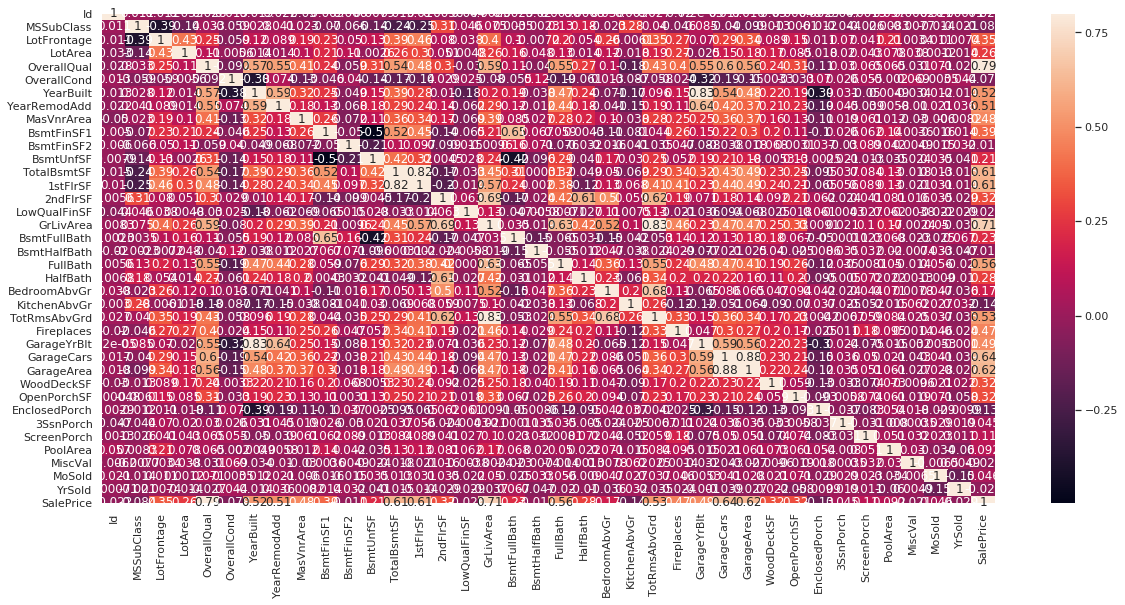

In [372]:
#correlation matrix
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True)

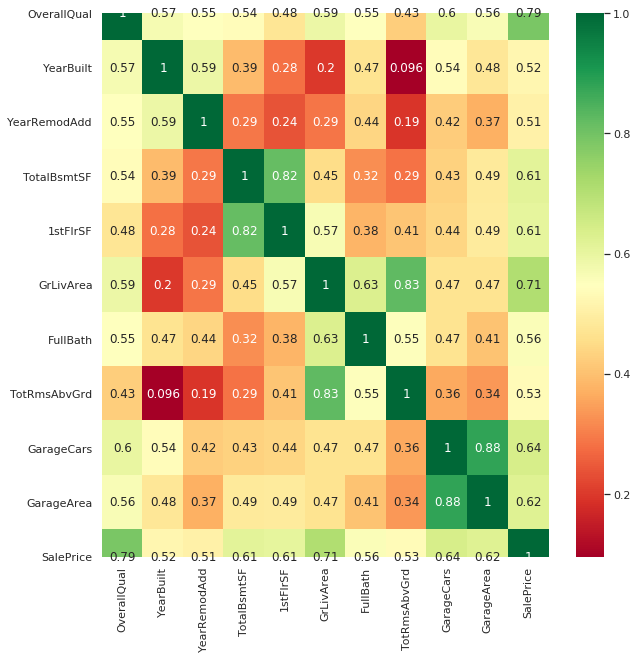

In [373]:
# most correlated features
corrmat = train_data.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

How each feature is correlated with SalePrice??

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


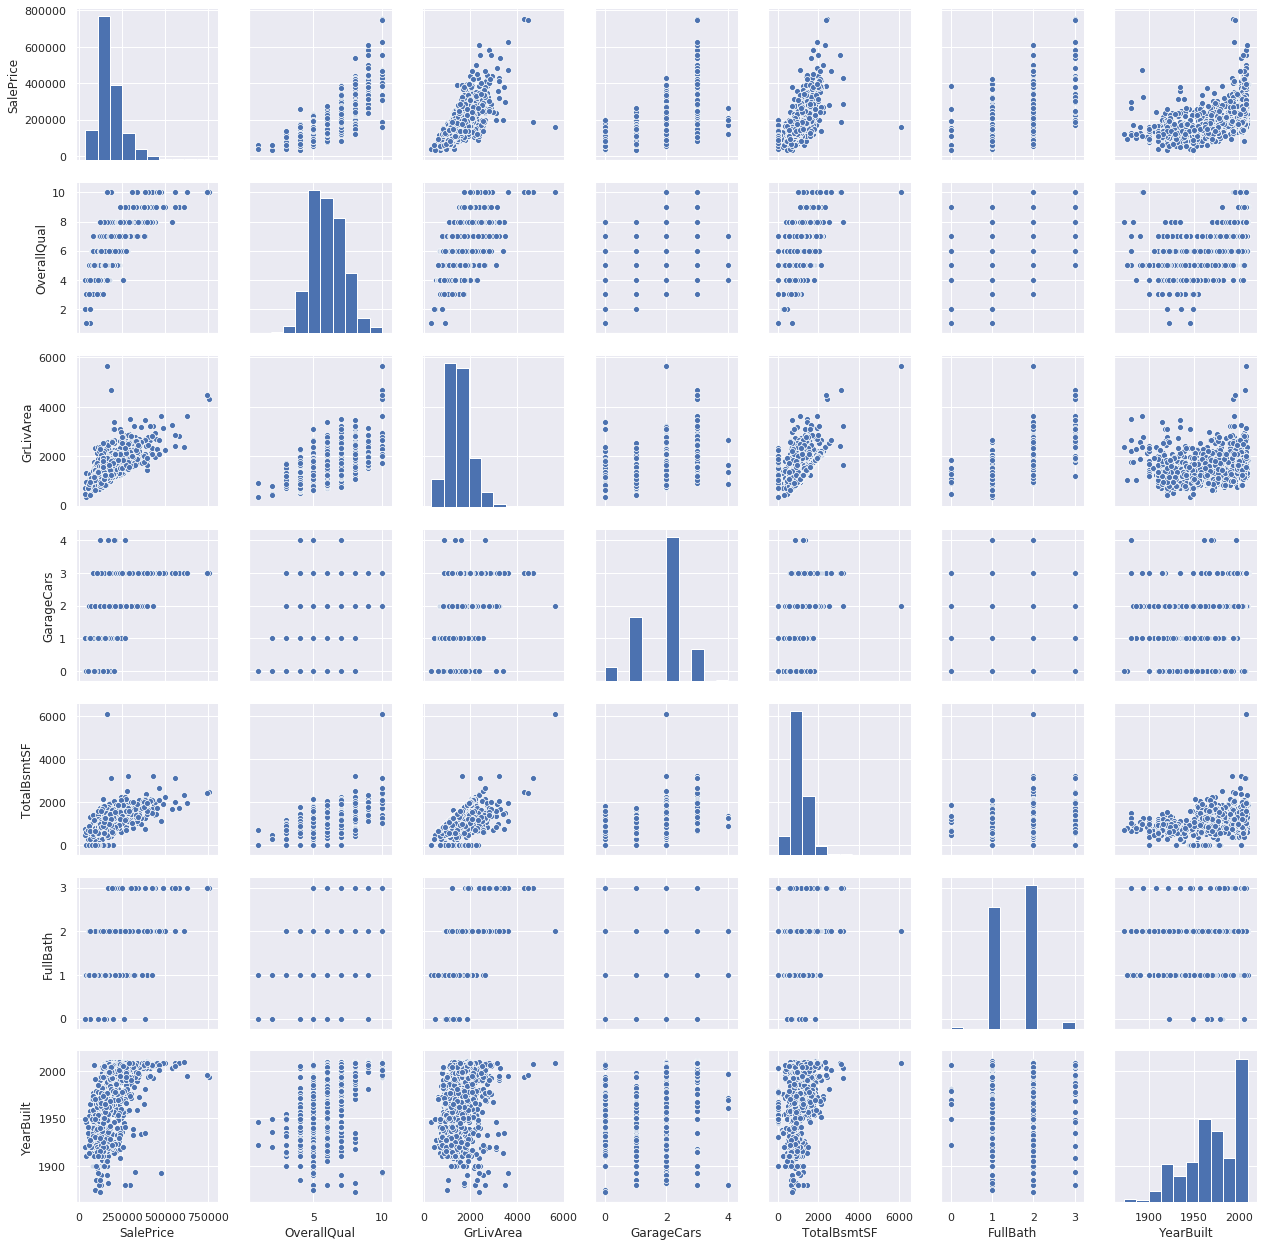

In [374]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols], size = 2.5)
plt.show()

# 2. Data preprocessing 

### 2.1 Drop culumns

In [0]:
train = train_data[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','SalePrice']]
test = test_data[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]

In [376]:
train.isnull().sum()

OverallQual    0
GrLivArea      0
GarageCars     0
TotalBsmtSF    0
FullBath       0
YearBuilt      0
SalePrice      0
dtype: int64

In [377]:
test.isnull().sum()

OverallQual    0
GrLivArea      0
GarageCars     1
TotalBsmtSF    1
FullBath       0
YearBuilt      0
dtype: int64

In [0]:
#It is useful wayto combine train data and test data.
train_test_data = [train,test]

## 2.2 OverallQual

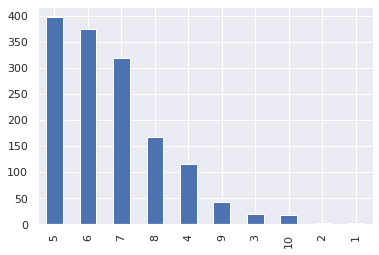

In [379]:
train['OverallQual'].value_counts().plot(kind='bar')

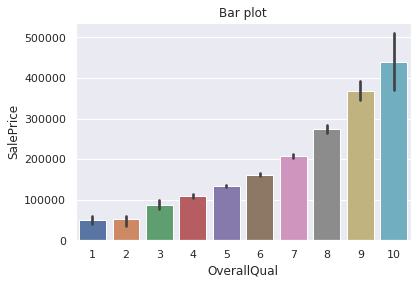

In [380]:
with sns.axes_style('darkgrid'):
  bars = sns.barplot(train.OverallQual,train.SalePrice)
  bars.set_title('Bar plot')
plt.show()

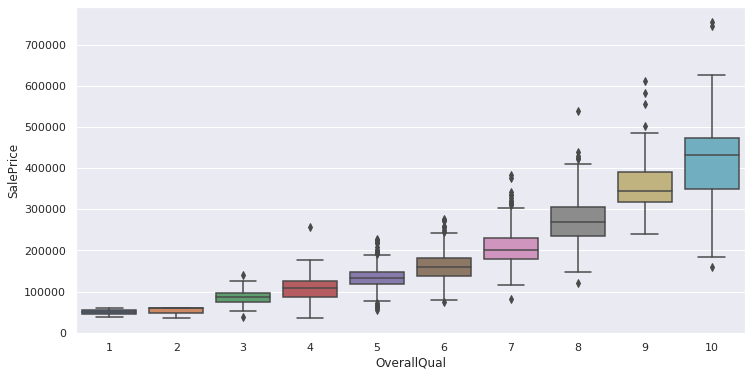

In [381]:
# sns.boxplot()

plt.figure(figsize=(12,6),facecolor='w')
plt.grid(True)

sns.boxplot(x='OverallQual',y='SalePrice',data=train_data)
plt.show()

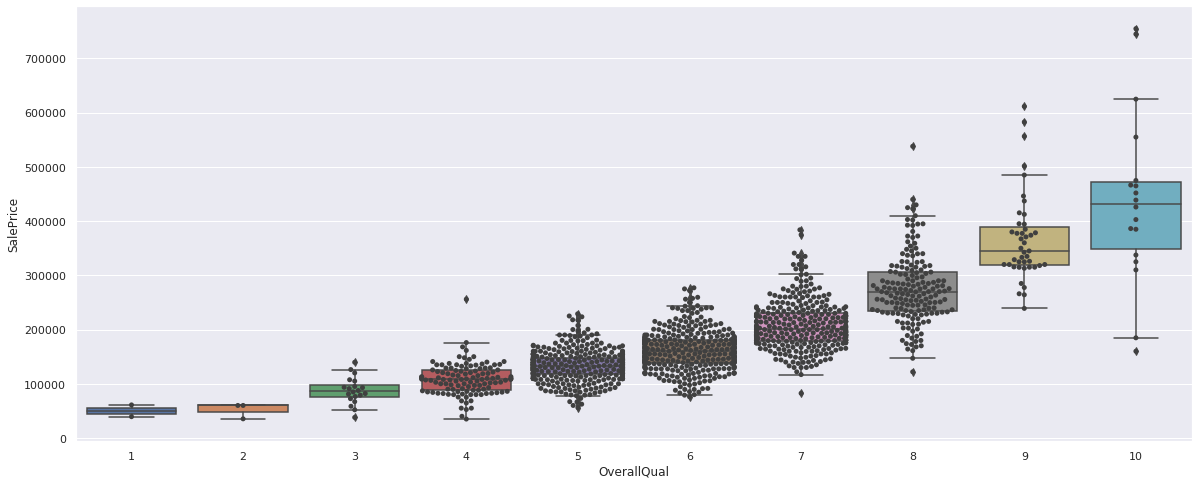

In [382]:
# sns. swarmplot()

plt.figure(figsize=(20,8),facecolor='w')
plt.grid(True)

sns.boxplot(x='OverallQual',y='SalePrice',data=train_data)
sns.swarmplot(x='OverallQual',y='SalePrice',data=train_data,color='.25')
plt.show()

In [383]:
OverallQual_mapping = {1:0,2:0.2,3:0.4,4:0.6,5:0.8,6:1,7:1.2,8:1.4,9:1.6,10:1.8}

for dataset in train_test_data:
  dataset['OverallQual'] = dataset['OverallQual'].map(OverallQual_mapping)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [384]:
train.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,SalePrice
0,1.2,1710,2,856,2,2003,208500
1,1.0,1262,2,1262,2,1976,181500
2,1.2,1786,2,920,2,2001,223500
3,1.2,1717,3,756,1,1915,140000
4,1.4,2198,3,1145,2,2000,250000


In [385]:
test.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,0.8,896,1.0,882.0,1,1961
1,1.0,1329,1.0,1329.0,1,1958
2,0.8,1629,2.0,928.0,2,1997
3,1.0,1604,2.0,926.0,2,1998
4,1.4,1280,2.0,1280.0,2,1992


## 2.3 GrLivArea
- null X in dataset

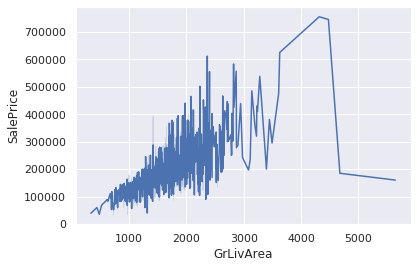

In [386]:
sns.lineplot(train.GrLivArea,train.SalePrice)

(300, 2400)

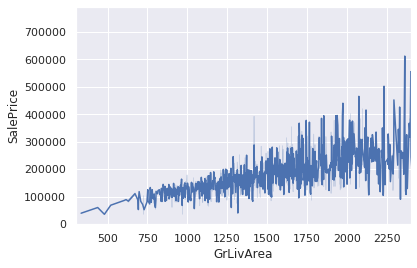

In [387]:
sns.lineplot(train.GrLivArea,train.SalePrice)
plt.xlim(300,2400)

(2400, 3400)

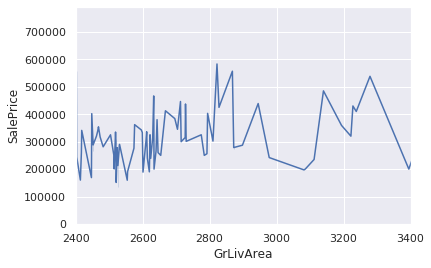

In [388]:
sns.lineplot(train.GrLivArea,train.SalePrice)
plt.xlim(2400,3400)

(3400, 4400)

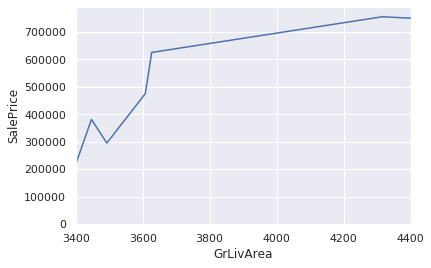

In [389]:
sns.lineplot(train.GrLivArea,train.SalePrice)
plt.xlim(3400,4400)

(4400, 4650)

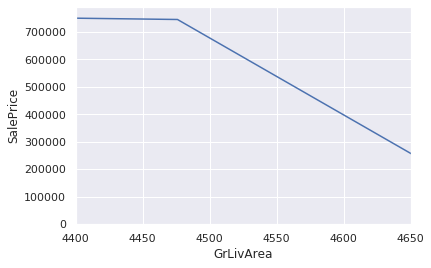

In [390]:
sns.lineplot(train.GrLivArea,train.SalePrice)
plt.xlim(4400,4650)

(4650, 6000)

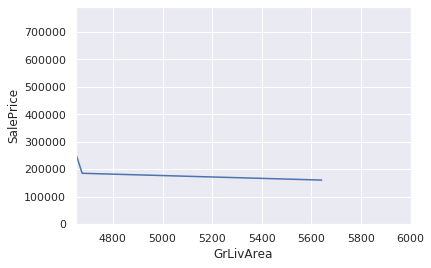

In [391]:
sns.lineplot(train.GrLivArea,train.SalePrice)
plt.xlim(4650,6000)

### label encoding

In [392]:
for dataset in train_test_data:
  dataset.loc[dataset['GrLivArea']<=2400,'GrLivArea']=0.5,
  dataset.loc[(dataset['GrLivArea']>2400) & (dataset['GrLivArea']<=3400),'GrLivArea']=1,
  dataset.loc[(dataset['GrLivArea']>3400) & (dataset['GrLivArea']<=4400),'GrLivArea']=1.5,
  dataset.loc[(dataset['GrLivArea']>4400) & (dataset['GrLivArea']<=4650),'GrLivArea']=2,
  dataset.loc[(dataset['GrLivArea']>4650) & (dataset['GrLivArea']<=6000),'GrLivArea']=2.5

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [393]:
train['GrLivArea'].value_counts()

0.5    1375
1.0      77
1.5       5
2.5       2
2.0       1
Name: GrLivArea, dtype: int64

In [394]:
train.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,SalePrice
0,1.2,0.5,2,856,2,2003,208500
1,1.0,0.5,2,1262,2,1976,181500
2,1.2,0.5,2,920,2,2001,223500
3,1.2,0.5,3,756,1,1915,140000
4,1.4,0.5,3,1145,2,2000,250000


In [395]:
test.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,0.8,0.5,1.0,882.0,1,1961
1,1.0,0.5,1.0,1329.0,1,1958
2,0.8,0.5,2.0,928.0,2,1997
3,1.0,0.5,2.0,926.0,2,1998
4,1.4,0.5,2.0,1280.0,2,1992


## 2.4 GarageCars

In [396]:
train['GarageCars'].dtype

dtype('int64')

In [397]:
train['GarageCars'].isnull().sum()

0

In [398]:
test['GarageCars'].isnull().sum()

1

In [399]:
train['GarageCars'].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

### Change Null to others
Make null to 2 because number '2' is more half than othres


차고의 개수는 2가 절반이상이므로 2로 처리하자.

In [400]:
test['GarageCars'].isnull().sum()

1

In [401]:
test['GarageCars']=test['GarageCars'].fillna(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Visualization

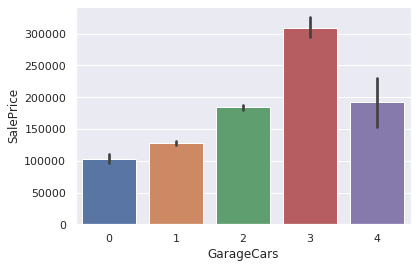

In [402]:
sns.barplot(train.GarageCars,train.SalePrice)

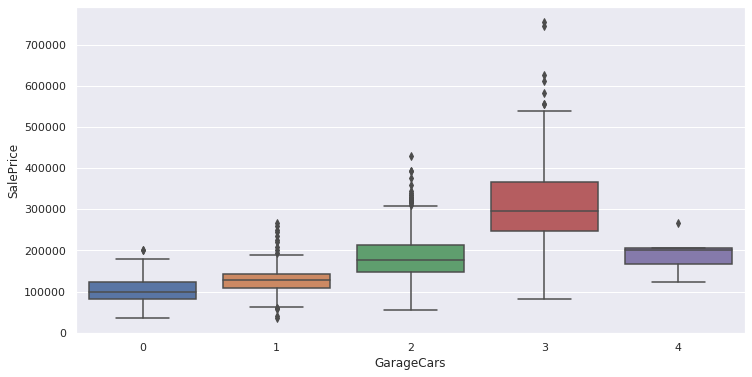

In [403]:
# sns.boxplot()

plt.figure(figsize=(12,6),facecolor='w')
plt.grid(True)

sns.boxplot(x='GarageCars',y='SalePrice',data=train_data)
plt.show()

## 2.5 TotalBsmtSF
- TotalBsmtSF: Total square feet of basement area (지하실 평수)

In [404]:
train['TotalBsmtSF'].dtype

dtype('int64')

### Visualization

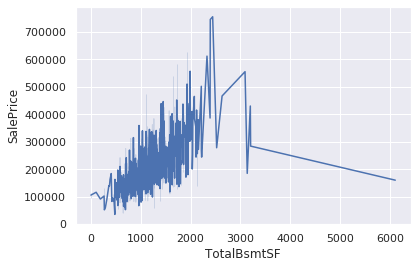

In [405]:
sns.lineplot(train['TotalBsmtSF'],train['SalePrice'])

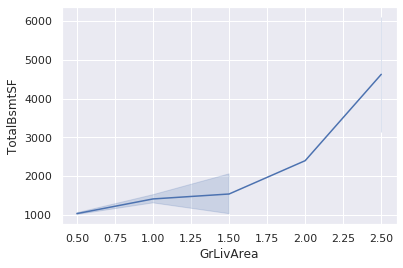

In [406]:
sns.lineplot(train['GrLivArea'],train['TotalBsmtSF'])

TotalBsmtSF changes with GrLivArea growth. So, I should Null of TotalBsmtSF to median(TotalBsmtSF of each GrLivArea)

### Change Null to others

In [407]:
train['TotalBsmtSF'].isnull().sum()

0

In [408]:
test['TotalBsmtSF'].isnull().sum()

1

In [409]:
test['TotalBsmtSF'].fillna(test.groupby('GrLivArea')['TotalBsmtSF'].
                                transform('median'),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [410]:
test['TotalBsmtSF'].isnull().sum()

0

### label encoding
0-2500 :1
2500-3000:2
3000~ :3

In [411]:
for dataset in train_test_data:
  dataset.loc[dataset['TotalBsmtSF']<=2500,'TotalBsmtSF']=1,
  dataset.loc[(dataset['TotalBsmtSF']>2500)&(dataset['TotalBsmtSF']<=3000),'TotalBsmtSF']=2,
  dataset.loc[dataset['TotalBsmtSF']>3000,'TotalBsmtSF']=3

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [412]:
train['TotalBsmtSF'].value_counts()

1    1453
3       5
2       2
Name: TotalBsmtSF, dtype: int64

## 2.6 FullBath
- I think there is nothing to modify

In [413]:
train['FullBath'].dtype

dtype('int64')

In [414]:
train['FullBath'].value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

In [415]:
print(train['FullBath'].isnull().sum())
print(test['FullBath'].isnull().sum())

0
0


## 2.7 YearBuilt

In [416]:
train['YearBuilt'].dtype

dtype('int64')

In [417]:
print(train['YearBuilt'].isnull().sum())
print(test['YearBuilt'].isnull().sum())

0
0


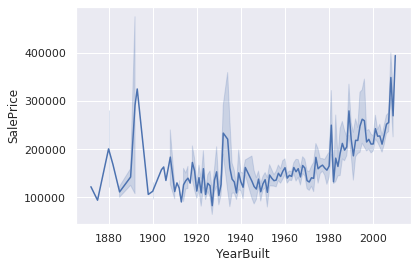

In [418]:
sns.lineplot('YearBuilt','SalePrice',data=train) #0-1900,1900-1940,1940-1980,1980-

### label encoding
- I can't understand why Boolean Indexing can't do Data Preprocess.

In [419]:
for dataset in train_test_data:
  dataset[dataset['YearBuilt']<1900]['YearBuilt'] =0.5
  dataset[(dataset['YearBuilt']>=1900) & (dataset['YearBuilt']<1940)]['YearBuilt'] =1
  dataset[(dataset['YearBuilt']>=1940) & (dataset['YearBuilt']<1980)]['YearBuilt'] =1.5
  dataset[dataset['YearBuilt']>=1980]['YearBuilt'] =2  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [420]:
train.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,SalePrice
0,1.2,0.5,2,1,2,2003,208500
1,1.0,0.5,2,1,2,1976,181500
2,1.2,0.5,2,1,2,2001,223500
3,1.2,0.5,3,1,1,1915,140000
4,1.4,0.5,3,1,2,2000,250000


In [421]:
for dataset in train_test_data:
  dataset.loc[dataset['YearBuilt']<1900,'YearBuilt'] =0.5
  dataset.loc[(dataset['YearBuilt']>=1900) & (dataset['YearBuilt']<1940),'YearBuilt']=1
  dataset.loc[(dataset['YearBuilt']>=1940) & (dataset['YearBuilt']<1980),'YearBuilt']=1.5
  dataset.loc[dataset['YearBuilt']>=1980,'YearBuilt']=2

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [422]:
train.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,SalePrice
0,1.2,0.5,2,1,2,2.0,208500
1,1.0,0.5,2,1,2,1.5,181500
2,1.2,0.5,2,1,2,2.0,223500
3,1.2,0.5,3,1,1,1.0,140000
4,1.4,0.5,3,1,2,2.0,250000


# Modeling

## 3.1 Tensorflow

In [0]:
import tensorflow as tf
import numpy as np

In [435]:
x_data=np.array(train.iloc[:,:-1])
y_data = np.array(train.iloc[:,[-1]])
print('x_data.shape:',x_data.shape)
print('y_data.shape:',y_data.shape)

x_data.shape: (1460, 6)
y_data.shape: (1460, 1)


In [459]:
test_data= np.array(test)
test_data.shape

(1459, 6)

In [0]:
X = tf.placeholder(tf.float32,shape=[None,6])
Y = tf.placeholder(tf.float32,shape=[None,1])

In [0]:
W = tf.Variable(tf.random_normal([6,1]),name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')

In [0]:
# Hypothesis
hypothesis = tf.matmul(X,W)+b

#Simple cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis -Y))
#Minimize
optimizer =tf.train.GradientDescentOptimizer(learning_rate =1e-5)
train_opt = optimizer.minimize(cost)

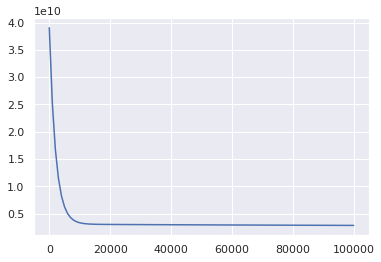

In [490]:
#launch the graph in a session
sess =tf.Session()
#Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

t1=[]
t2=[]
for step in range(100001):
  cost_val,hy_val,_ =sess.run(
      [cost,hypothesis,train_opt],feed_dict={X:x_data,Y:y_data})
  if step %1000 ==0:
   #print(step,'cost:',cost_val,'\nPrediction:\n',hy_val)
    t1.append(step)
    t2.append(cost_val)

plt.plot(t1,t2,label='w,k')

#test
test_list =[]
test_y = sess.run(hypothesis,feed_dict={X:test_data})
test_list.append(test_y)

In [480]:
for i in range(len(sample_sub)):
  sample_sub['SalePrice'][i] = test_list[0][i][0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
sample_sub.to_csv('/content/drive/My Drive/Colab Notebooks/data/home-data-for-ml-course/HousePrice_sub.csv',index=False)